### **KUMUD KUMAR**

### PGP-AIML OCT21A

**DOMAIN:** Digital content management

**CONTEXT:** Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem

**DATA DESCRIPTION:** Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label url link.

**PROJECT OBJECTIVE:** To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

**PART - A**

In [1]:
# importing various libraries
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

#! pip install gensim
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
import keras
from keras_preprocessing.sequence import pad_sequences
#!pip install pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Bidirectional,Conv1D, MaxPooling1D, Dropout, Activation
from tensorflow.keras.layers import Embedding
import string
import json
import random
import tensorflow as tf

1. 

In [2]:
# loading the dataset

from zipfile import ZipFile

with ZipFile('C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/blogs.zip', 'r') as zipdata:
    zipdata.extractall("C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/unzipped") 

In [3]:
df= pd.read_csv("C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/unzipped/blogtext.csv")

In [4]:
df.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...


In [5]:
# shape of dataframe 
df.shape

(681284, 7)

In [6]:
print('Unique values in the column gender are',df['gender'].nunique(),'\n')
print('Unique values in the column age are',df['age'].nunique(),'\n')
print('Unique values in the column topic are',df['topic'].nunique(),'\n')
print('Unique values in the column sign are',df['sign'].nunique())

Unique values in the column gender are 2 

Unique values in the column age are 26 

Unique values in the column topic are 40 

Unique values in the column sign are 12


In [7]:
print(df.topic.unique())

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']


In [8]:
# checking for null values

df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [9]:
# droping duplicates and resetting index

df.drop_duplicates(subset="text",inplace=True)

df.reset_index(inplace = True,drop=True)

There are 4686 duplicates in the dataset, we drop these duplicates from the dataset

In [10]:
# new shape of dataframe

df.shape

(611652, 7)

In [11]:
df['topic'].value_counts()

indUnk                     230835
Student                    136051
Technology                  34430
Education                   28477
Arts                        26387
Communications-Media        19037
Internet                    15545
Non-Profit                  13029
Engineering                 10573
Law                          8701
Publishing                   7248
Science                      6500
Government                   6139
Consulting                   5339
Fashion                      4545
Marketing                    4508
Religion                     4503
Advertising                  4446
BusinessServices             4251
Accounting                   3672
Telecommunications           3670
Military                     2995
Banking                      2893
Sports-Recreation            2747
Chemicals                    2455
HumanResources               2354
RealEstate                   2327
Transportation               2143
Manufacturing                2008
Museums-Librar

In [12]:
# dropping unneccessary columns

df.drop(['id','date'], axis=1, inplace=True)


**EDA**

<AxesSubplot:xlabel='gender', ylabel='count'>

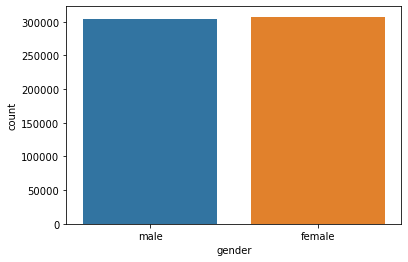

In [13]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

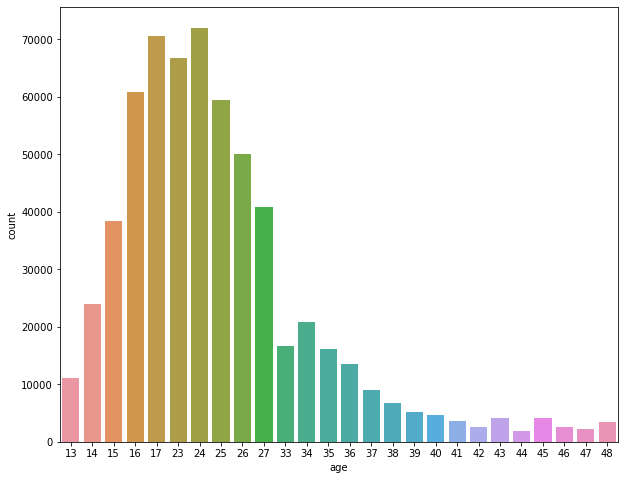

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='age',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'InvestmentBanking'),
  Text(2, 0, 'indUnk'),
  Text(3, 0, 'Non-Profit'),
  Text(4, 0, 'Banking'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Engineering'),
  Text(7, 0, 'Science'),
  Text(8, 0, 'Communications-Media'),
  Text(9, 0, 'BusinessServices'),
  Text(10, 0, 'Sports-Recreation'),
  Text(11, 0, 'Arts'),
  Text(12, 0, 'Internet'),
  Text(13, 0, 'Museums-Libraries'),
  Text(14, 0, 'Accounting'),
  Text(15, 0, 'Technology'),
  Text(16, 0, 'Law'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Automotive'),
  Text(19, 0, 'Religion'),
  Text(20, 0, 'Fashion'),
  Text(21, 0, 'Publishing'),
  Text(22, 0, 'Marketing'),
  Text(23, 0, 'LawEnforcement-Security'),
  Text(24, 0, 'HumanResources'),
  Text(25, 0, 'Telecommunications'),
  Text(26, 0, 'Military'),
  Text(27, 0, '

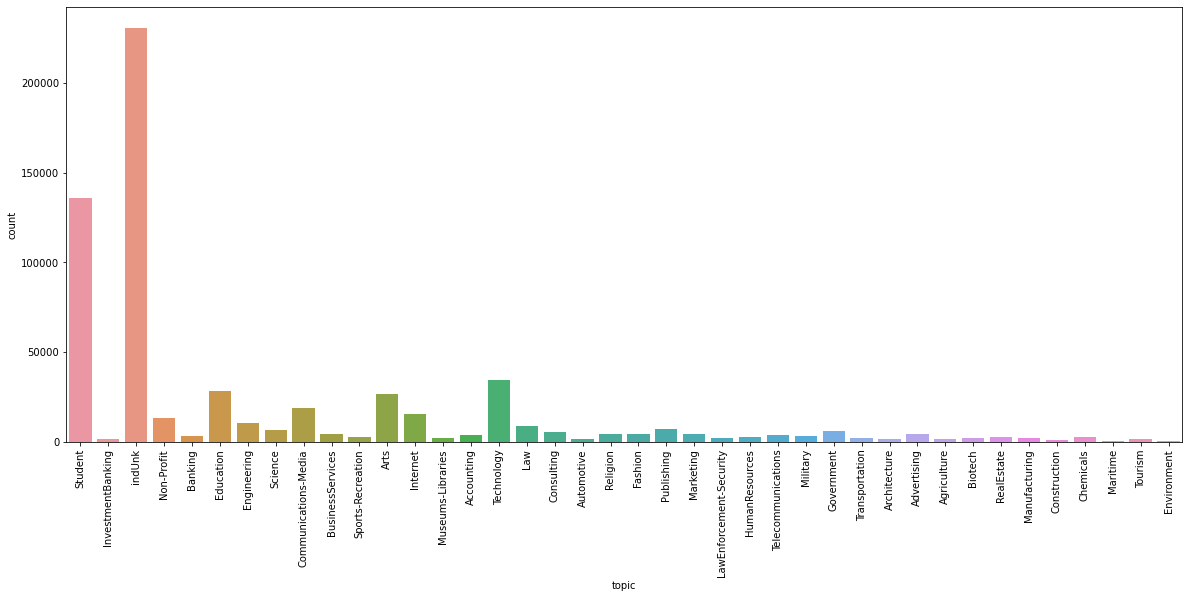

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='topic',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Leo'),
  Text(1, 0, 'Aquarius'),
  Text(2, 0, 'Aries'),
  Text(3, 0, 'Capricorn'),
  Text(4, 0, 'Gemini'),
  Text(5, 0, 'Cancer'),
  Text(6, 0, 'Sagittarius'),
  Text(7, 0, 'Scorpio'),
  Text(8, 0, 'Libra'),
  Text(9, 0, 'Virgo'),
  Text(10, 0, 'Taurus'),
  Text(11, 0, 'Pisces')])

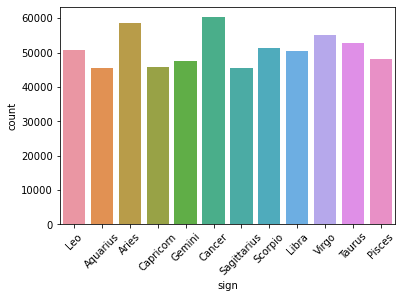

In [16]:
sns.countplot(x='sign',data=df)
plt.xticks(rotation=45)

In [17]:
# replacing indUnk with Unknown_industry in the topic column

df['topic'].replace('indUnk','Unknown_industry', inplace= True)

In [18]:
#Stratified sampling functions
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    
    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
                
            # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = pd.concat([stratified_df,tmp_df], ignore_index=True)
    
    return stratified_df

def stratified_sample_report(df, strata, size=None):
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd


def __smpl_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [19]:
stratified_sample_report(df, ['sign', 'gender','topic', 'age'], 10000)

,sign,gender,topic,age,size,samp_size
0,Aquarius,female,Accounting,16,23,0
1,Aquarius,female,Accounting,23,8,0
2,Aquarius,female,Accounting,24,299,5
3,Aquarius,female,Accounting,25,3,0
4,Aquarius,female,Accounting,26,20,0
...,...,...,...,...,...,...
5161,Virgo,male,Unknown_industry,42,45,1
5162,Virgo,male,Unknown_industry,43,25,0
5163,Virgo,male,Unknown_industry,44,6,0
5164,Virgo,male,Unknown_industry,46,49,1


In [20]:
# As sample data is very huge , we are using a subset of the dataset. 
# Stratification is used to maintain the distribution of the dataset.

In [21]:
corpus_df = stratified_sample(df, ['sign', 'gender', 'topic', 'age'], size=10000, seed=121, keep_index= True)

In [22]:
# Head of new dataset

corpus_df.head()


,index,gender,age,topic,sign,text
0,553210,female,24,Accounting,Aquarius,"ok, Thomas i also did one.....Here you ..."
1,553285,female,24,Accounting,Aquarius,urlLink Outside my house~wonderful&...
2,553105,female,24,Accounting,Aquarius,"Here i am posting again, for some reaso..."
3,553278,female,24,Accounting,Aquarius,Another i hate my second job and all th...
4,553116,female,24,Accounting,Aquarius,urlLink Brainbench - The Measure of Ac...


In [23]:
# # tail of dataset

corpus_df.tail()

,index,gender,age,topic,sign,text
9602,434583,male,41,Unknown_industry,Virgo,Dance Like No One's Watching u...
9603,45858,male,41,Unknown_industry,Virgo,Hijacking the language of war A...
9604,434557,male,41,Unknown_industry,Virgo,The Luck of the Bloggish Oh I'...
9605,181243,male,42,Unknown_industry,Virgo,As everybody knows there has been a re...
9606,550236,male,46,Unknown_industry,Virgo,Busy summer for me. I've got two bo...


<ipython-input-24-dd1e474a8dc5>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


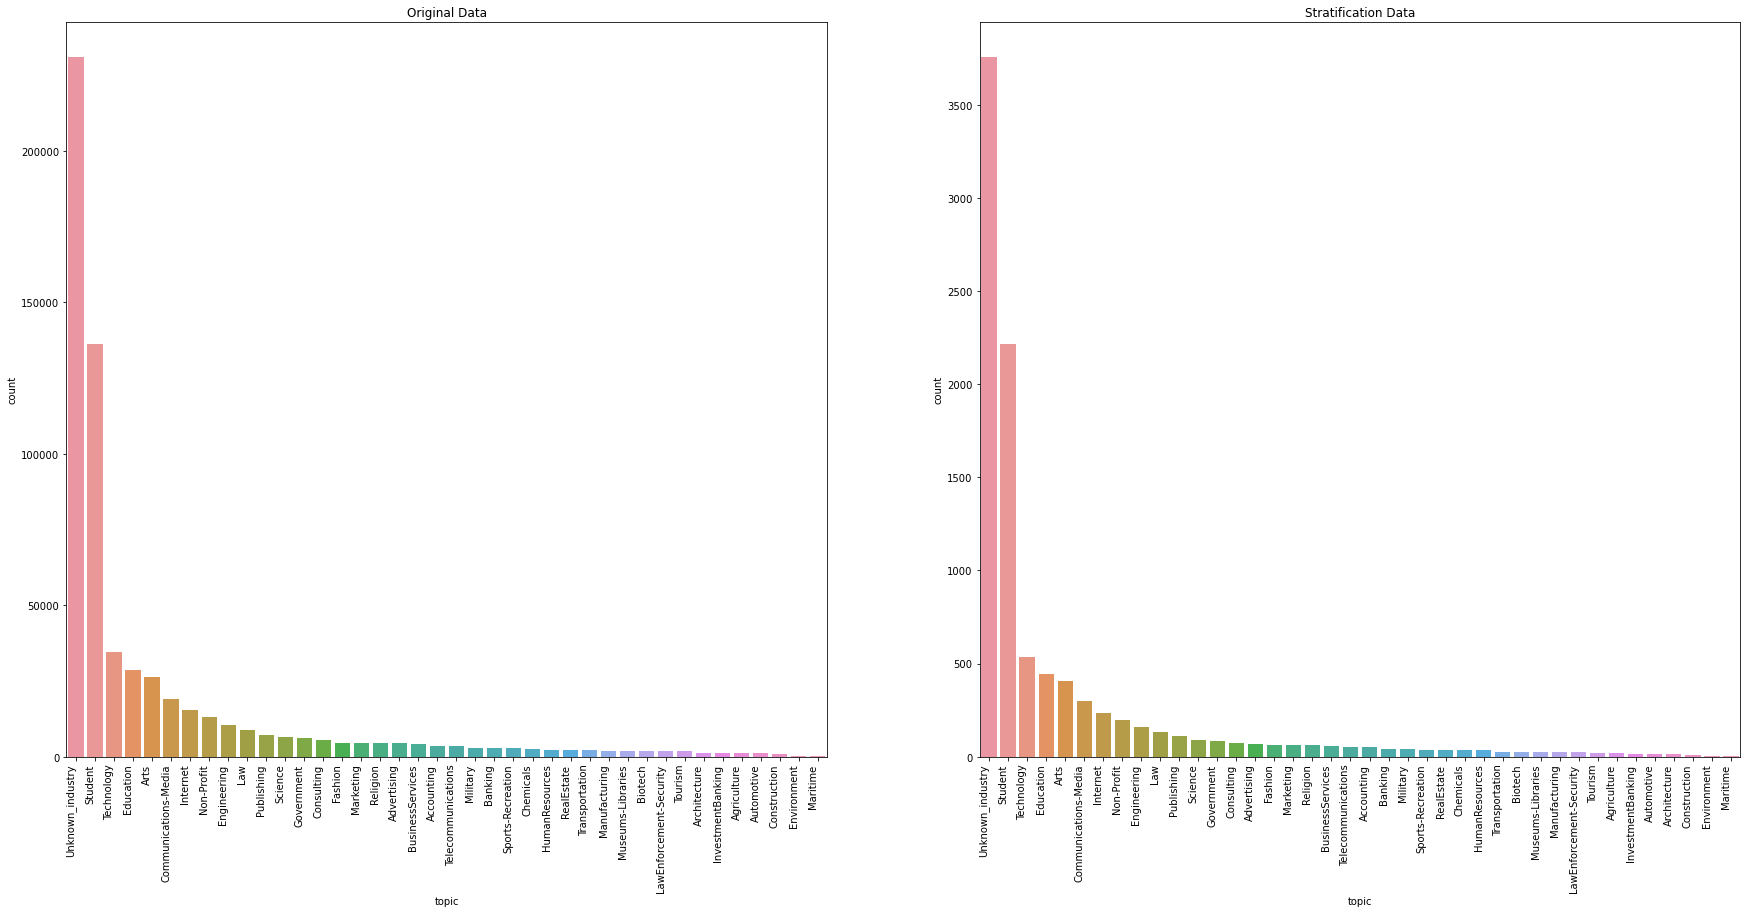

In [24]:
# checking for data distribution with original data

fig, ax = plt.subplots(1, 2, figsize=(30, 15))
fig.autofmt_xdate(rotation=90)

sns.countplot(x='topic', data=df, order = df['topic'].value_counts().index, ax=ax[0])
ax[0].set_title("Original Data")

sns.countplot(x='topic', data=corpus_df,order = corpus_df['topic'].value_counts().index, ax=ax[1])
ax[1].set_title("Stratification Data")

fig.show()

In [25]:
# It follows the same distribution as the original data

Conclusion:
1. Majority of topic is unknown_industry
2. There is equal distribution of gender based data 
3. All the duplicates were removed from the dataset

1B: Cleaning the structured data

1. Missing values

In [26]:
# Misiing value Imputations 

corpus_df.isnull().sum()

index     0
gender    0
age       0
topic     0
sign      0
text      0
dtype: int64

There are no null or missing values present

2. Eliminating non english words

In [27]:
#! pip install langdetect

In [28]:
from langdetect import detect

def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False


In [29]:
corpus_df = corpus_df[corpus_df['text'].apply(detect_english)]

In [30]:
# new datashape after eliminating non english words

print("After eliminating Non-English textual data")
corpus_df.shape

After eliminating Non-English textual data


(9241, 6)

In [31]:
#Before Pre-Process steps, let us remove other columns from the dataframe

corpus_df.drop(labels=['index','gender','age','sign'], axis=1,inplace=True)

2. **DATA** **PREPROCESSING**

In [32]:
# remove all the places where the string urllink comes
corpus_df['text_new']=corpus_df['text'].apply(lambda x: re.sub(r'urlLink|urllink','',x)) 

# remove all the places where any url comes that starts with http or https
corpus_df['text_new']=corpus_df['text'].apply(lambda x: re.sub(r'https?\S+','',x))

In [33]:
# removing all the spaces

corpus_df["text_new"] = corpus_df["text"].apply(lambda x: x.strip())

In [34]:
#Eliminate All special Characters and Numbers
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

#Lowercase all textual data
def lower_case(text):
    return text.lower()    

#Eliminate All special Characters and Numbers
def remove_tags(text):    
    return re.sub("</?.*?>"," <> ", text)

#Eliminate All special Characters and Numbers
def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

#def remove_stop_words(tokenized_text):
    #return [w for w in tokenized_text if not w in set(stopwords.words('english'))]

# #Remove all Stopwords and lemmatize
def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma





In [35]:
def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [36]:
corpus_df['new_text'] = corpus_df['text_new'].apply(normalize_text)

In [37]:
#Example of any sample text 

print(corpus_df['text'][3])
print()
print(corpus_df['new_text'][3])

       Another i hate my second job and all the people that work there. Yup it happens and i think more than it should. Our new boss is ok, but i think he makes alot of bad choices... specially when it comes  to hiring people. Yup he seems to be the shitty people magnent.Shelle feels another you can kiss my ass moment coming on. Not going to Texas to see my mom like i thought, because even tho i work EVERY DAY OFF, they couldnt get someone to cover my shift, how nice is that. I think im getting fed up with being pushed around, some would say its about time.The one reason why i dont really tell them off is because i was hoping to move up there and make a little raise or two. eesh (bites lip)Would quit but my bills should be outlawed.  I have to work all weekend , yeah for me... ..    ....     ...   . .. ..    .. . .. .... ..      ....   . . . ..            

another hate second job people work yup happens think new bos ok think make alot bad choice specially come hiring people yup seems

## 3. Base Classification Model

### 3A:

In [38]:
#text_new
X = corpus_df['new_text']

#topic
corpus_df['labels'] = corpus_df['topic'].str.lower()
labels = corpus_df['labels']

corpus_df.drop(columns=['topic'], axis=1, inplace=True)

corpus_df.head()

,text,text_new,new_text,labels
0,"ok, Thomas i also did one.....Here you ...","ok, Thomas i also did one.....Here you go ever...",ok thomas also one go everyone urllink blunt t...,accounting
2,"Here i am posting again, for some reaso...","Here i am posting again, for some reason we ha...",posting reason problem house lost blog old hou...,accounting
3,Another i hate my second job and all th...,Another i hate my second job and all the peopl...,another hate second job people work yup happen...,accounting
4,urlLink Brainbench - The Measure of Ac...,urlLink Brainbench - The Measure of Achievemen...,urllink brainbench measure achievement awesome...,accounting
5,Why does the posting page loo...,Why does the posting page look different every...,posting page look different every time hell we...,advertising


### 3B: Splitting data into train & test set 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,labels, test_size = 0.30, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6468,)
(2773,)
(6468,)
(2773,)


### 3C:  Vectorize data using any one vectorizer. 

In [40]:
# Creating Bag of words
vectorizer = CountVectorizer(min_df = 2,ngram_range = (1,2),stop_words = "english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print("X_train shape & sample",X_train.shape)
X_train[0]

X_train shape & sample (6468, 67892)


<1x67892 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [41]:
# Document term matrix 
dtm_x_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names())
print(dtm_x_train.head())

   aa  aaa  aaah  aaah fuck  aap  aaron  aaron brown  aaron told  ab  aback  \
0   0    0     0          0    0      0            0           0   0      0   
1   0    0     0          0    0      0            0           0   0      0   
2   0    0     0          0    0      0            0           0   0      0   
3   0    0     0          0    0      0            0           0   0      0   
4   0    0     0          0    0      0            0           0   0      0   

   ...  zoolander  zoom  zooming  zoot  zq  zu  zucchini  zurich  zzz  zzzzzz  
0  ...          0     0        0     0   0   0         0       0    0       0  
1  ...          0     0        0     0   0   0         0       0    0       0  
2  ...          0     0        0     0   0   0         0       0    0       0  
3  ...          0     0        0     0   0   0         0       0    0       0  
4  ...          0     0        0     0   0   0         0       0    0       0  

[5 rows x 67892 columns]


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
dtm_x_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())
print(dtm_x_test.head())

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   aa  aaa  aaah  aaah fuck  aap  aaron  aaron brown  aaron told  ab  aback  \
0   0    0     0          0    0      0            0           0   0      0   
1   0    0     0          0    0      0            0           0   0      0   
2   0    0     0          0    0      0            0           0   0      0   
3   0    0     0          0    0      0            0           0   0      0   
4   0    0     0          0    0      0            0           0   0      0   

   ...  zoolander  zoom  zooming  zoot  zq  zu  zucchini  zurich  zzz  zzzzzz  
0  ...          0     0        0     0   0   0         0       0    0       0  
1  ...          0     0        0     0   0   0         0       0    0       0  
2  ...          0     0        0     0   0   0         0       0    0       0  
3  ...          0     0        0     0   0   0         0       0    0       0  
4  ...          0     0        0     0   0   0         0       0    0       0  

[5 rows x 67892 columns]


In [43]:
#Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label.
vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
labels_vector = vectorizer_labels.fit_transform(labels)
vectorizer_labels.vocabulary_

{'accounting': 0,
 'advertising': 1,
 'arts': 4,
 'banking': 6,
 'biotech': 7,
 'businessservices': 8,
 'communications': 10,
 'media': 27,
 'consulting': 12,
 'education': 13,
 'environment': 15,
 'fashion': 16,
 'government': 17,
 'humanresources': 18,
 'internet': 19,
 'law': 21,
 'manufacturing': 24,
 'marketing': 26,
 'non': 30,
 'profit': 31,
 'publishing': 32,
 'religion': 35,
 'science': 36,
 'sports': 38,
 'recreation': 34,
 'student': 39,
 'technology': 40,
 'transportation': 43,
 'unknown_industry': 44,
 'chemicals': 9,
 'construction': 11,
 'engineering': 14,
 'investmentbanking': 20,
 'military': 28,
 'museums': 29,
 'libraries': 23,
 'tourism': 42,
 'architecture': 3,
 'lawenforcement': 22,
 'security': 37,
 'realestate': 33,
 'telecommunications': 41,
 'agriculture': 2,
 'automotive': 5,
 'maritime': 25}

In [44]:
# Extracing only key value from above dictionary, which contains unique labels. These set of labels will be used as classes in multilabelbinariser further.
label_classes = []  
for key in vectorizer_labels.vocabulary_.keys():
    label_classes.append(key)
    
print(sorted(label_classes))

['accounting', 'advertising', 'agriculture', 'architecture', 'arts', 'automotive', 'banking', 'biotech', 'businessservices', 'chemicals', 'communications', 'construction', 'consulting', 'education', 'engineering', 'environment', 'fashion', 'government', 'humanresources', 'internet', 'investmentbanking', 'law', 'lawenforcement', 'libraries', 'manufacturing', 'maritime', 'marketing', 'media', 'military', 'museums', 'non', 'profit', 'publishing', 'realestate', 'recreation', 'religion', 'science', 'security', 'sports', 'student', 'technology', 'telecommunications', 'tourism', 'transportation', 'unknown_industry']


In [45]:
# initialising multilabelbinariser with all unique possible classes
mlb = MultiLabelBinarizer(classes = label_classes) 

In [46]:
# Converting entire se of labels into format required by mlb
labels = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in labels]]
labels[30]

['arts']

In [47]:
labels_trans = mlb.fit(labels) # transforming entire set of lables
labels_trans

MultiLabelBinarizer(classes=['accounting', 'advertising', 'arts', 'banking',
                             'biotech', 'businessservices', 'communications',
                             'media', 'consulting', 'education', 'environment',
                             'fashion', 'government', 'humanresources',
                             'internet', 'law', 'manufacturing', 'marketing',
                             'non', 'profit', 'publishing', 'religion',
                             'science', 'sports', 'recreation', 'student',
                             'technology', 'transportation', 'unknown_industry',
                             'chemicals', ...])

In [48]:
#Convert Y_train into a format as required by mlb 
Y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in Y_train]]
Y_train[30]

['education']

In [49]:
Y_train_trans = mlb.transform(Y_train) # transforming Train lables using mlb which is trained on all possible unnique labels on entire data set
Y_train_trans[30]

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:875: UserWarning: unknown class(es) ['communicationsmedia', 'lawenforcementsecurity', 'museumslibraries', 'nonprofit', 'sportsrecreation'] will be ignored
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [50]:
Y_train_trans.shape

(6468, 45)

In [51]:
#Convert Y_test into a format as required by mlb 
Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in Y_test]]
Y_test_trans = mlb.transform(Y_test) # transforming test labels.
print(Y_test[30])

['arts']


In [52]:
Y_test_trans[30]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [53]:
len(mlb.classes_)

45

In [54]:
mlb.classes_

array(['accounting', 'advertising', 'arts', 'banking', 'biotech',
       'businessservices', 'communications', 'media', 'consulting',
       'education', 'environment', 'fashion', 'government',
       'humanresources', 'internet', 'law', 'manufacturing', 'marketing',
       'non', 'profit', 'publishing', 'religion', 'science', 'sports',
       'recreation', 'student', 'technology', 'transportation',
       'unknown_industry', 'chemicals', 'construction', 'engineering',
       'investmentbanking', 'military', 'museums', 'libraries', 'tourism',
       'architecture', 'lawenforcement', 'security', 'realestate',
       'telecommunications', 'agriculture', 'automotive', 'maritime'],
      dtype=object)

In [55]:
Y_train_trans[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [56]:
Y_train[10]

['unknown_industry']

### 3D: Build a base model for Supervised Learning - Classification. 

In [57]:
clf = LogisticRegression(solver = 'lbfgs',max_iter = 1000)  # initiating the classifier
#from sklearn.svm import SVC
#clf = SVC(kernel = "linear")
clf = OneVsRestClassifier(clf)

In [58]:
clf.fit(X_train,Y_train_trans)

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 7 is present in all training examples.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 18 is present in all training examples.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 19 is present in all training examples.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 24 is present in all training examples.
  warnings.warn(
C:\Use

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [59]:
print("Train Accuracy:",clf.score(X_train,Y_train_trans))

Train Accuracy: 0.9420222634508348


In [60]:
Y_pred = clf.predict(X_test)

In [61]:
print(classification_report(Y_test_trans, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        17
           2       0.10      0.01      0.02       119
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         8
           5       1.00      0.08      0.15        12
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        22
           9       0.09      0.02      0.03       128
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         8
          14       0.25      0.02      0.03        65
          15       0.00      0.00      0.00        49
          16       0.00      0.00      0.00         9
          17       0.00    

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUM

In [62]:
print("Test Accuracy:" + str(accuracy_score(Y_test_trans, Y_pred)))
print("F1: " + str(f1_score(Y_test_trans, Y_pred, average='micro')))
print("F1_macro: " + str(f1_score(Y_test_trans, Y_pred, average='macro')))
print("Precision: " + str(precision_score(Y_test_trans, Y_pred, average='micro')))
print("Precision_macro: " + str(precision_score(Y_test_trans, Y_pred, average='macro')))
print("Recall: " + str(recall_score(Y_test_trans, Y_pred, average='micro')))
print("Recall_macro: " + str(recall_score(Y_test_trans, Y_pred, average='macro')))

Test Accuracy:0.21168409664623153
F1: 0.27162406403304934
F1_macro: 0.021078852768531955
Precision: 0.41352201257861637
Precision_macro: 0.05610762116999647
Recall: 0.20222991157247214
Recall_macro: 0.015891505292972497


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Improve Performance of model. 

#### A. Experiment with other vectorisers 

#### a) Word2Vec 

In [63]:
corpus_df.head()

,text,text_new,new_text,labels
0,"ok, Thomas i also did one.....Here you ...","ok, Thomas i also did one.....Here you go ever...",ok thomas also one go everyone urllink blunt t...,accounting
2,"Here i am posting again, for some reaso...","Here i am posting again, for some reason we ha...",posting reason problem house lost blog old hou...,accounting
3,Another i hate my second job and all th...,Another i hate my second job and all the peopl...,another hate second job people work yup happen...,accounting
4,urlLink Brainbench - The Measure of Ac...,urlLink Brainbench - The Measure of Achievemen...,urllink brainbench measure achievement awesome...,accounting
5,Why does the posting page loo...,Why does the posting page look different every...,posting page look different every time hell we...,advertising


In [64]:
#convert preprocessed sentence to tokenized sentence

corpus_df['new_text_tok']=[nltk.word_tokenize(i) for i in corpus_df['new_text']] 

In [65]:
#min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
model = Word2Vec(corpus_df['new_text_tok'],min_count=1)

In [66]:
model.wv.most_similar('people')

[('reason', 0.8283962607383728),
 ('others', 0.8218168616294861),
 ('often', 0.8172793984413147),
 ('different', 0.8162515163421631),
 ('idea', 0.8153139352798462),
 ('thing', 0.8109713792800903),
 ('fact', 0.8109222650527954),
 ('world', 0.8099380731582642),
 ('experience', 0.808639645576477),
 ('friendship', 0.8071004152297974)]

In [67]:
 #combination of word and its vector
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 

In [68]:
#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [69]:
corpus_df.head()

,text,text_new,new_text,labels,new_text_tok
0,"ok, Thomas i also did one.....Here you ...","ok, Thomas i also did one.....Here you go ever...",ok thomas also one go everyone urllink blunt t...,accounting,"[ok, thomas, also, one, go, everyone, urllink,..."
2,"Here i am posting again, for some reaso...","Here i am posting again, for some reason we ha...",posting reason problem house lost blog old hou...,accounting,"[posting, reason, problem, house, lost, blog, ..."
3,Another i hate my second job and all th...,Another i hate my second job and all the peopl...,another hate second job people work yup happen...,accounting,"[another, hate, second, job, people, work, yup..."
4,urlLink Brainbench - The Measure of Ac...,urlLink Brainbench - The Measure of Achievemen...,urllink brainbench measure achievement awesome...,accounting,"[urllink, brainbench, measure, achievement, aw..."
5,Why does the posting page loo...,Why does the posting page look different every...,posting page look different every time hell we...,advertising,"[posting, page, look, different, every, time, ..."


In [70]:
le = LabelEncoder()
corpus_df['Target'] = le.fit_transform(corpus_df['labels'])
corpus_df.head()

,text,text_new,new_text,labels,new_text_tok,Target
0,"ok, Thomas i also did one.....Here you ...","ok, Thomas i also did one.....Here you go ever...",ok thomas also one go everyone urllink blunt t...,accounting,"[ok, thomas, also, one, go, everyone, urllink,...",0
2,"Here i am posting again, for some reaso...","Here i am posting again, for some reason we ha...",posting reason problem house lost blog old hou...,accounting,"[posting, reason, problem, house, lost, blog, ...",0
3,Another i hate my second job and all th...,Another i hate my second job and all the peopl...,another hate second job people work yup happen...,accounting,"[another, hate, second, job, people, work, yup...",0
4,urlLink Brainbench - The Measure of Ac...,urlLink Brainbench - The Measure of Achievemen...,urllink brainbench measure achievement awesome...,accounting,"[urllink, brainbench, measure, achievement, aw...",0
5,Why does the posting page loo...,Why does the posting page look different every...,posting page look different every time hell we...,advertising,"[posting, page, look, different, every, time, ...",1


### Train test split of labelled dataset

In [71]:
X_train, X_val, y_train, y_val = train_test_split(corpus_df["text_new"],corpus_df["Target"],test_size=0.2,shuffle=True)

In [72]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [73]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

In [74]:
#tfidf runs on non-tokenized sentences unlike word2vec
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [75]:
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

In [76]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

### Logistic Regression with TF-IDF 

In [77]:
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

In [78]:
print("Test Accuracy:" + str(accuracy_score(y_val,y_predict)))
print("F1: " + str(f1_score(y_val,y_predict, average='micro')))
print("F1_macro: " + str(f1_score(y_val,y_predict, average='macro')))
print("Precision: " + str(precision_score(y_val,y_predict, average='micro')))
print("Precision_macro: " + str(precision_score(y_val,y_predict, average='macro')))
print("Recall: " + str(recall_score(y_val,y_predict, average='micro')))
print("Recall_macro: " + str(recall_score(y_val,y_predict, average='macro')))

Test Accuracy:0.40400216333153055
F1: 0.40400216333153055
F1_macro: 0.034900219617417606
Precision: 0.40400216333153055
Precision_macro: 0.14996448695285503
Recall: 0.40400216333153055
Recall_macro: 0.03720531462520551


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression with w2v 

In [83]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]

In [84]:
print("Test Accuracy:" + str(accuracy_score(y_val,y_predict)))
print("F1: " + str(f1_score(y_val,y_predict, average='micro')))
print("F1_macro: " + str(f1_score(y_val,y_predict, average='macro')))
print("Precision: " + str(precision_score(y_val,y_predict, average='micro')))
print("Precision_macro: " + str(precision_score(y_val,y_predict, average='macro')))
print("Recall: " + str(recall_score(y_val,y_predict, average='micro')))
print("Recall_macro: " + str(recall_score(y_val,y_predict, average='macro')))

Test Accuracy:0.3942671714440238
F1: 0.3942671714440238
F1_macro: 0.020520901745898698
Precision: 0.3942671714440238
Precision_macro: 0.02173472038797116
Recall: 0.3942671714440238
Recall_macro: 0.02843401298340384


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.B: Building classifers model for other algorithms 

In [86]:
glove_path = 'C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/glove.6B.300d.txt'
embeddings_index = {}
f = open(glove_path, encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    #print(embeddings_index)
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [87]:
# list all golve words
all_glove_words = list(embeddings_index.keys())

### Tokenizer - After fit on all GloVe words, tokenizer vocabulary size is 400k words

In [88]:
# Tokenize
vocabulary_size = len(all_glove_words)
tokenizer = Tokenizer() #num_words= vocabulary_size
tokenizer.fit_on_texts(all_glove_words) 

### Creat Embedding Matrix 

In [90]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 300)) 
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [91]:
print(embedding_matrix.shape)

(400000, 300)


In [92]:
corpus_df.head()

,text,text_new,new_text,labels,new_text_tok,Target
0,"ok, Thomas i also did one.....Here you ...","ok, Thomas i also did one.....Here you go ever...",ok thomas also one go everyone urllink blunt t...,accounting,"[ok, thomas, also, one, go, everyone, urllink,...",0
2,"Here i am posting again, for some reaso...","Here i am posting again, for some reason we ha...",posting reason problem house lost blog old hou...,accounting,"[posting, reason, problem, house, lost, blog, ...",0
3,Another i hate my second job and all th...,Another i hate my second job and all the peopl...,another hate second job people work yup happen...,accounting,"[another, hate, second, job, people, work, yup...",0
4,urlLink Brainbench - The Measure of Ac...,urlLink Brainbench - The Measure of Achievemen...,urllink brainbench measure achievement awesome...,accounting,"[urllink, brainbench, measure, achievement, aw...",0
5,Why does the posting page loo...,Why does the posting page look different every...,posting page look different every time hell we...,advertising,"[posting, page, look, different, every, time, ...",1


In [93]:
corpus_df['labels'].nunique()

40

In [94]:
print(corpus_df.labels.unique())

['accounting' 'advertising' 'arts' 'banking' 'biotech' 'businessservices'
 'communications-media' 'consulting' 'education' 'environment' 'fashion'
 'government' 'humanresources' 'internet' 'law' 'manufacturing'
 'marketing' 'non-profit' 'publishing' 'religion' 'science'
 'sports-recreation' 'student' 'technology' 'transportation'
 'unknown_industry' 'chemicals' 'construction' 'engineering'
 'investmentbanking' 'military' 'museums-libraries' 'tourism'
 'architecture' 'lawenforcement-security' 'realestate'
 'telecommunications' 'agriculture' 'automotive' 'maritime']


In [95]:
labels = corpus_df['Target']

num_classes = 40
labels_cat = keras.utils.to_categorical(np.array(labels), num_classes)

In [96]:
maxlen = 750
sequences = tokenizer.texts_to_sequences(corpus_df['new_text_tok'])
data = pad_sequences(sequences, maxlen=maxlen)

In [97]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, output_dim=300, input_length=maxlen, weights=[embedding_matrix], trainable=False))
#model_glove.add(Dropout(0.2))
#model_glove.add(Conv1D(64, 2, activation='relu')) 
model_glove.add(LSTM(64))
model_glove.add(Dense(40, activation='softmax'))

model_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
X_train, X_val, y_train, y_val = train_test_split(data, labels_cat, test_size=0.2, random_state=1)

In [99]:
# training the model
model_glove.fit(X_train, y_train, epochs = 10, verbose=2)

Epoch 1/10
231/231 - 82s - loss: 2.3024 - accuracy: 0.3816 - 82s/epoch - 353ms/step
Epoch 2/10
231/231 - 70s - loss: 2.1718 - accuracy: 0.4010 - 70s/epoch - 305ms/step
Epoch 3/10
231/231 - 73s - loss: 2.1294 - accuracy: 0.4096 - 73s/epoch - 317ms/step
Epoch 4/10
231/231 - 73s - loss: 2.0766 - accuracy: 0.4215 - 73s/epoch - 317ms/step
Epoch 5/10
231/231 - 74s - loss: 2.0200 - accuracy: 0.4340 - 74s/epoch - 319ms/step
Epoch 6/10
231/231 - 73s - loss: 1.9602 - accuracy: 0.4483 - 73s/epoch - 316ms/step
Epoch 7/10
231/231 - 75s - loss: 1.8860 - accuracy: 0.4605 - 75s/epoch - 326ms/step
Epoch 8/10
231/231 - 74s - loss: 1.8096 - accuracy: 0.4857 - 74s/epoch - 321ms/step
Epoch 9/10
231/231 - 75s - loss: 1.7210 - accuracy: 0.5076 - 75s/epoch - 327ms/step
Epoch 10/10
231/231 - 79s - loss: 1.6368 - accuracy: 0.5303 - 79s/epoch - 340ms/step


In [100]:
score, acc = model_glove.evaluate(X_val, y_val)

58/58 [==============================] - 12s 180ms/step - loss: 2.3266 - accuracy: 0.3835


In [101]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 2.326601266860962
Test accuracy: 0.3834505081176758


### 4C. Tune Parameters/Hyperparameters of the model/s

In [104]:
param_list = {
    "penalty" :         ["l2", "l1"],
    "C" :               [ 1.0, 1e-1, 5e-1 ],
    "class_weight" :    ["balanced", None],
    "solver" :          ["newton-cg", "sag"],
    "l1_ratio" :        [0.1, 0.2, 0.3]
}

In [111]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
tuned_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                   param_list, 
                                   verbose = 10,
                                   n_iter = 20, # only few iterations because n_jobs = -1 crashes the notebook
                                   #n_jobs = -1   
                                  ).fit(X_train_vectors_tfidf, y_train.argmax(axis = 1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 1/5; 1/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 1/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 2/5; 1/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 1/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 3/5; 1/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 1/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 4/5; 1/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 2/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.002 total time=  17.8s
[CV 2/5; 2/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 2/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.004 total time=  17.9s
[CV 3/5; 2/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 2/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.001 total time=  18.4s
[CV 4/5; 2/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 2/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.001 total time=  20.0s
[CV 5/5; 2/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 2/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.005 total time=  17.6s
[CV 1/5; 3/20] START C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 1/5; 3/20] END C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 3/20] START C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 2/5; 3/20] END C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 3/20] START C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 3/5; 3/20] END C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 3/20] START C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 4/5; 3/20] END C=1.0, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 3/20] START C=1.0, c

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 5/20] END C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.379 total time= 1.0min
[CV 3/5; 5/20] START C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 5/20] END C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.389 total time= 1.0min
[CV 4/5; 5/20] START C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 5/20] END C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.378 total time= 1.1min
[CV 5/5; 5/20] START C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 5/20] END C=1.0, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.383 total time=  59.8s
[CV 1/5; 6/20] START C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 6/20] END C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.389 total time=  20.1s
[CV 2/5; 6/20] START C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag
[CV 2/5; 6/20] END C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.385 total time=  16.7s
[CV 3/5; 6/20] START C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 6/20] END C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.391 total time=  19.9s
[CV 4/5; 6/20] START C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 6/20] END C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.387 total time=  20.1s
[CV 5/5; 6/20] START C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 6/20] END C=0.5, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.385 total time=  18.7s
[CV 1/5; 7/20] START C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg
[CV 1/5; 7/20] END C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg;, score=0.025 total time=  32.1s
[CV 2/5; 7/20] START C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 7/20] END C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg;, score=0.028 total time=  27.7s
[CV 3/5; 7/20] START C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 7/20] END C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg;, score=0.023 total time=  30.2s
[CV 4/5; 7/20] START C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 7/20] END C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg;, score=0.018 total time=  31.9s
[CV 5/5; 7/20] START C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 7/20] END C=1.0, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=newton-cg;, score=0.028 total time=  34.5s
[CV 1/5; 8/20] START C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 1/5; 8/20] END C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 8/20] START C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 2/5; 8/20] END C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 8/20] START C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 3/5; 8/20] END C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 8/20] START C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 4/5; 8/20] END C=0.1, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 8/20] START C=

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 9/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.389 total time= 1.0min
[CV 2/5; 9/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 9/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.385 total time=  54.8s
[CV 3/5; 9/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 9/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.391 total time=  46.8s
[CV 4/5; 9/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 9/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.387 total time=  46.0s
[CV 5/5; 9/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 9/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.385 total time=  47.2s
[CV 1/5; 10/20] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 1/5; 10/20] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 10/20] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 2/5; 10/20] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 10/20] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 3/5; 10/20] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 10/20] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 4/5; 10/20] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 10/20] STA

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 11/20] END C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.013 total time=  26.4s
[CV 2/5; 11/20] START C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 11/20] END C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.009 total time=  22.5s
[CV 3/5; 11/20] START C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 11/20] END C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.007 total time=  23.7s
[CV 4/5; 11/20] START C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 11/20] END C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.009 total time=  22.5s
[CV 5/5; 11/20] START C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 11/20] END C=0.5, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=newton-cg;, score=0.012 total time=  26.0s
[CV 1/5; 12/20] START C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 12/20] END C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.391 total time=  16.7s
[CV 2/5; 12/20] START C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 12/20] END C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.391 total time=  10.6s
[CV 3/5; 12/20] START C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 12/20] END C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.390 total time=  17.3s
[CV 4/5; 12/20] START C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 12/20] END C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.390 total time=  17.0s
[CV 5/5; 12/20] START C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 12/20] END C=0.1, class_weight=None, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.390 total time=  17.1s
[CV 1/5; 13/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 1/5; 13/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 13/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 2/5; 13/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 13/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 3/5; 13/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 13/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag
[CV 4/5; 13/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 13/20] START C=

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 15/20] END C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.020 total time=  16.9s
[CV 2/5; 15/20] START C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 15/20] END C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.022 total time=  18.0s
[CV 3/5; 15/20] START C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 15/20] END C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.017 total time=  17.7s
[CV 4/5; 15/20] START C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 15/20] END C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.016 total time=  17.5s
[CV 5/5; 15/20] START C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 15/20] END C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.018 total time=  16.8s
[CV 1/5; 16/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 1/5; 16/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 16/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 2/5; 16/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 16/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 3/5; 16/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 16/20] START C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg
[CV 4/5; 16/20] END C=0.5, class_weight=None, l1_ratio=0.3, penalty=elasticnet, solver=newton-cg;, s

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 18/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.016 total time=  16.9s
[CV 2/5; 18/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 18/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.015 total time=  17.4s
[CV 3/5; 18/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 18/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.022 total time=  17.4s
[CV 4/5; 18/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 18/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.021 total time=  17.8s
[CV 5/5; 18/20] START C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag


C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\line

[CV 5/5; 18/20] END C=1.0, class_weight=balanced, l1_ratio=0.3, penalty=l2, solver=sag;, score=0.023 total time=  17.0s
[CV 1/5; 19/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg
[CV 1/5; 19/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 19/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg
[CV 2/5; 19/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 19/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg
[CV 3/5; 19/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 19/20] START C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg
[CV 4/5; 19/20] END C=0.1, class_weight=balanced, l1_ratio=0.1, penalty=

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [114]:

# Fetching the best hyperparameters
tuned_log_reg.best_params_
 

{'solver': 'sag',
 'penalty': 'l2',
 'l1_ratio': 0.3,
 'class_weight': None,
 'C': 0.1}

#### 4D: 

In [116]:
log_reg_tfidf_tuned = OneVsRestClassifier(
    LogisticRegression(C = 0.1, 
                       class_weight = "none", 
                       l1_ratio = 0.3, 
                       penalty = "l2", 
                       solver = "sag",
        )
    ).fit(X_train_vectors_tfidf, y_train.argmax(axis = 1))

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'el

C:\Users\KUMUD .LAPTOP-S0T3F3O8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### 5.  Share insights on relative performance comparison

#### 5A. Which vectorizer performed better? 

#### 5B. Which model outperformed? Probable reason? 

#### 5C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason? 

#### 5D: According to you, which performance metric should be given most importance, why? 

### Part B

• **DOMAIN**: Customer support

• **CONTEXT**: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human support executive if the request is complex or not in it’s database.

• **DATA DESCRIPTION**: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

• **PROJECT OBJECTIVE**: Design a python based interactive semi - rule based chatbot which can do the following:

1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [165]:
with open("C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/GL Bot.json") as file:
    chat_data = json.load(file)

In [166]:
#Display corpus
print(chat_data)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [167]:
# Adding more words/data to corpus 

# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
# Each list to create
words = []
classes = []
file_A = []
file_B = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in bot_data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        file_A.append(pattern)
        file_B.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
        
# lemmatize all the words in the vocab and convert them to lowercase

# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]

# sorting the vocab and classes 
words = sorted(set(words))
classes = sorted(set(classes))

In [168]:
print("Words:\n", words)
print()
print(" *"*55)
print()
print("Labels:\n", classes)

Words:
 ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'please', 'pm', 'problem', 'propagation', 'random', 'regression', 'relu', 'screw', 's

In [169]:
print(file_A)
print()
print(" *"*55)
print()
print(file_B)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [170]:
# list for training data
training = []
out_empty = [0] * len(classes)

# creating the bag of words model
for idx, doc in enumerate(file_A):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(file_B[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
    
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))# list for training data
training = []
out_empty = [0] * len(classes)

# creating the bag of words model
for idx, doc in enumerate(file_A):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated to
    output_row = list(out_empty)
    output_row[classes.index(file_B[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
    
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [171]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 150

#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model = Sequential()

# Input layer 
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(output_shape, activation = "softmax"))

#Defining optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

#Configuring the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])



In [172]:
# Model summary
print(model.summary())

# Training the model
model.fit(x=train_X, y=train_y, epochs=150, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20352     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 74/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9766
Epoch 75/150
4/4 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 0.9844
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9922
Epoch 77/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 78/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 79/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 80/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 81/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9922
Epoch 82/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 83/150
4/4 [===============

In [173]:
#Functions for Chatbot Sessions

def bag_of_words(text, vocab): 
    tokens = clean_text(text)
    bow = [0] * len(vocab)
    for w in tokens: 
        for idx, word in enumerate(vocab):
              if word == w: 
                bow[idx] = 1
    return np.array(bow)

def clean_text(text): 
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def pred_class(text, vocab, labels): 
    bow = bag_of_words(text, vocab)
    result = model.predict(np.array([bow]))[0]
    thresh = 0.2
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

    y_pred.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in y_pred:
        return_list.append(labels[r[0]])
    return return_list

def get_response(intents_list, intents_json): 
    tag = intents_list[0]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents: 
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            break
    return result

In [174]:
# Running the chatbot

print("BOT : Chat with the bot[Type 'quit' to END] !")
print("\nBOT : If answer is not  right[Type '?'] !")
while True:
  #Reading Input
    message = input("\n\nYou: ")
  #Correcting chat
    if message.lower() == "?":
        print("\nBOT:Please try again")
  #Stopping Chat
    if message.lower() == "quit":
        break
  #Predicting and printing response  
    intents = pred_class(message, words, classes)
    result = get_response(intents, chat_data)
    print("\nBOT : ", result)

BOT : Chat with the bot[Type 'quit' to END] !

BOT : If answer is not  right[Type '?'] !


You: Hi
1/1 [==============================] - 0s 153ms/step

BOT :  Hello! how can i help you ?


You: no link visible on olympus
1/1 [==============================] - 0s 24ms/step

BOT :  Link: Olympus wiki


You: when are your hours of opertions
1/1 [==============================] - 0s 22ms/step

BOT :  I am your virtual learning assistant


You: create a ticket
1/1 [==============================] - 0s 23ms/step

BOT :  Tarnsferring the request to your PM


You: what the hell
1/1 [==============================] - 0s 22ms/step

BOT :  Please use respectful words


You: okay
1/1 [==============================] - 0s 26ms/step

BOT :  Hello! how can i help you ?


You: quit
